<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/TWS_BackTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/Weekly5S/M2K20210103_to_20210108170000.pkl')

In [3]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [4]:
df.drop('time', axis=1, inplace=True)

In [5]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
# # df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
# df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [6]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2021-01-03 18:00:00')

In [7]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [8]:
df["dev"] = df.close - df.open
df["jump"] = df.high - df.low 

In [9]:
df = df[df.jump.ne(0.0)]

In [10]:
df.TradeDay.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# df.drop(df[df.TradeDay==0].index, inplace=True)

In [11]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.ne(0).rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [12]:
df['returns'] = np.log(df.avg/df.avg.shift(1))

In [13]:
df.TradeDay.unique()

array([0, 1, 2, 3, 4])

In [14]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

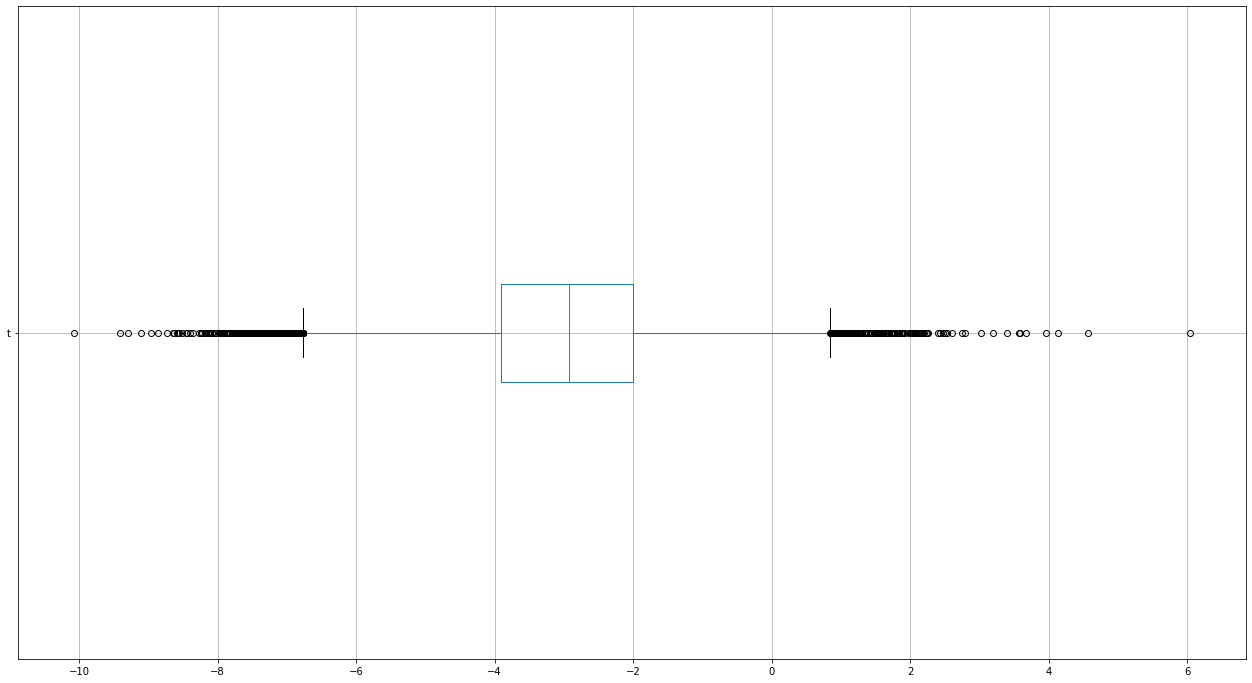

In [15]:
df.boxplot(column='t', vert=False, figsize=(22,12))

In [16]:
tupp=df.t.quantile(q=0.65)
tlow = df.t.quantile(q=0.35)
tupp, tlow

(-2.3977578273677698, -3.478818890545357)

In [17]:
df['strategy']=df.t.apply(lambda x: 1 if x > tupp else -1 if x < tlow else 0)

In [18]:
df['game'] = df.strategy.shift(1)*df.returns

In [19]:
df[['returns', 'game']].sum().apply(np.exp)

returns    1.053883
game       4.580381
dtype: float64

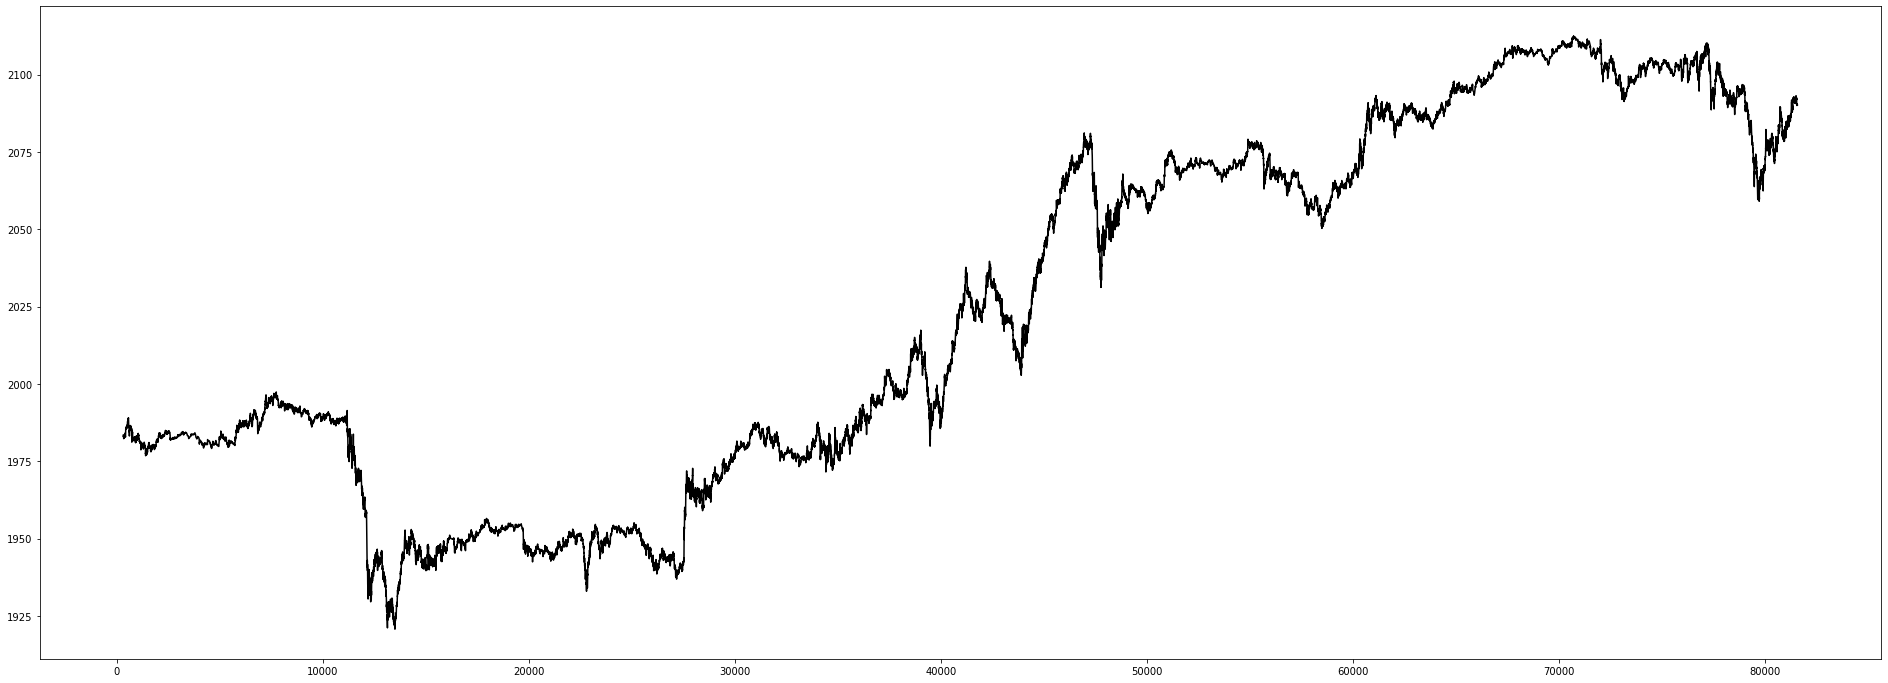

In [20]:
df.avg.plot(figsize=(33,12), colormap="copper")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


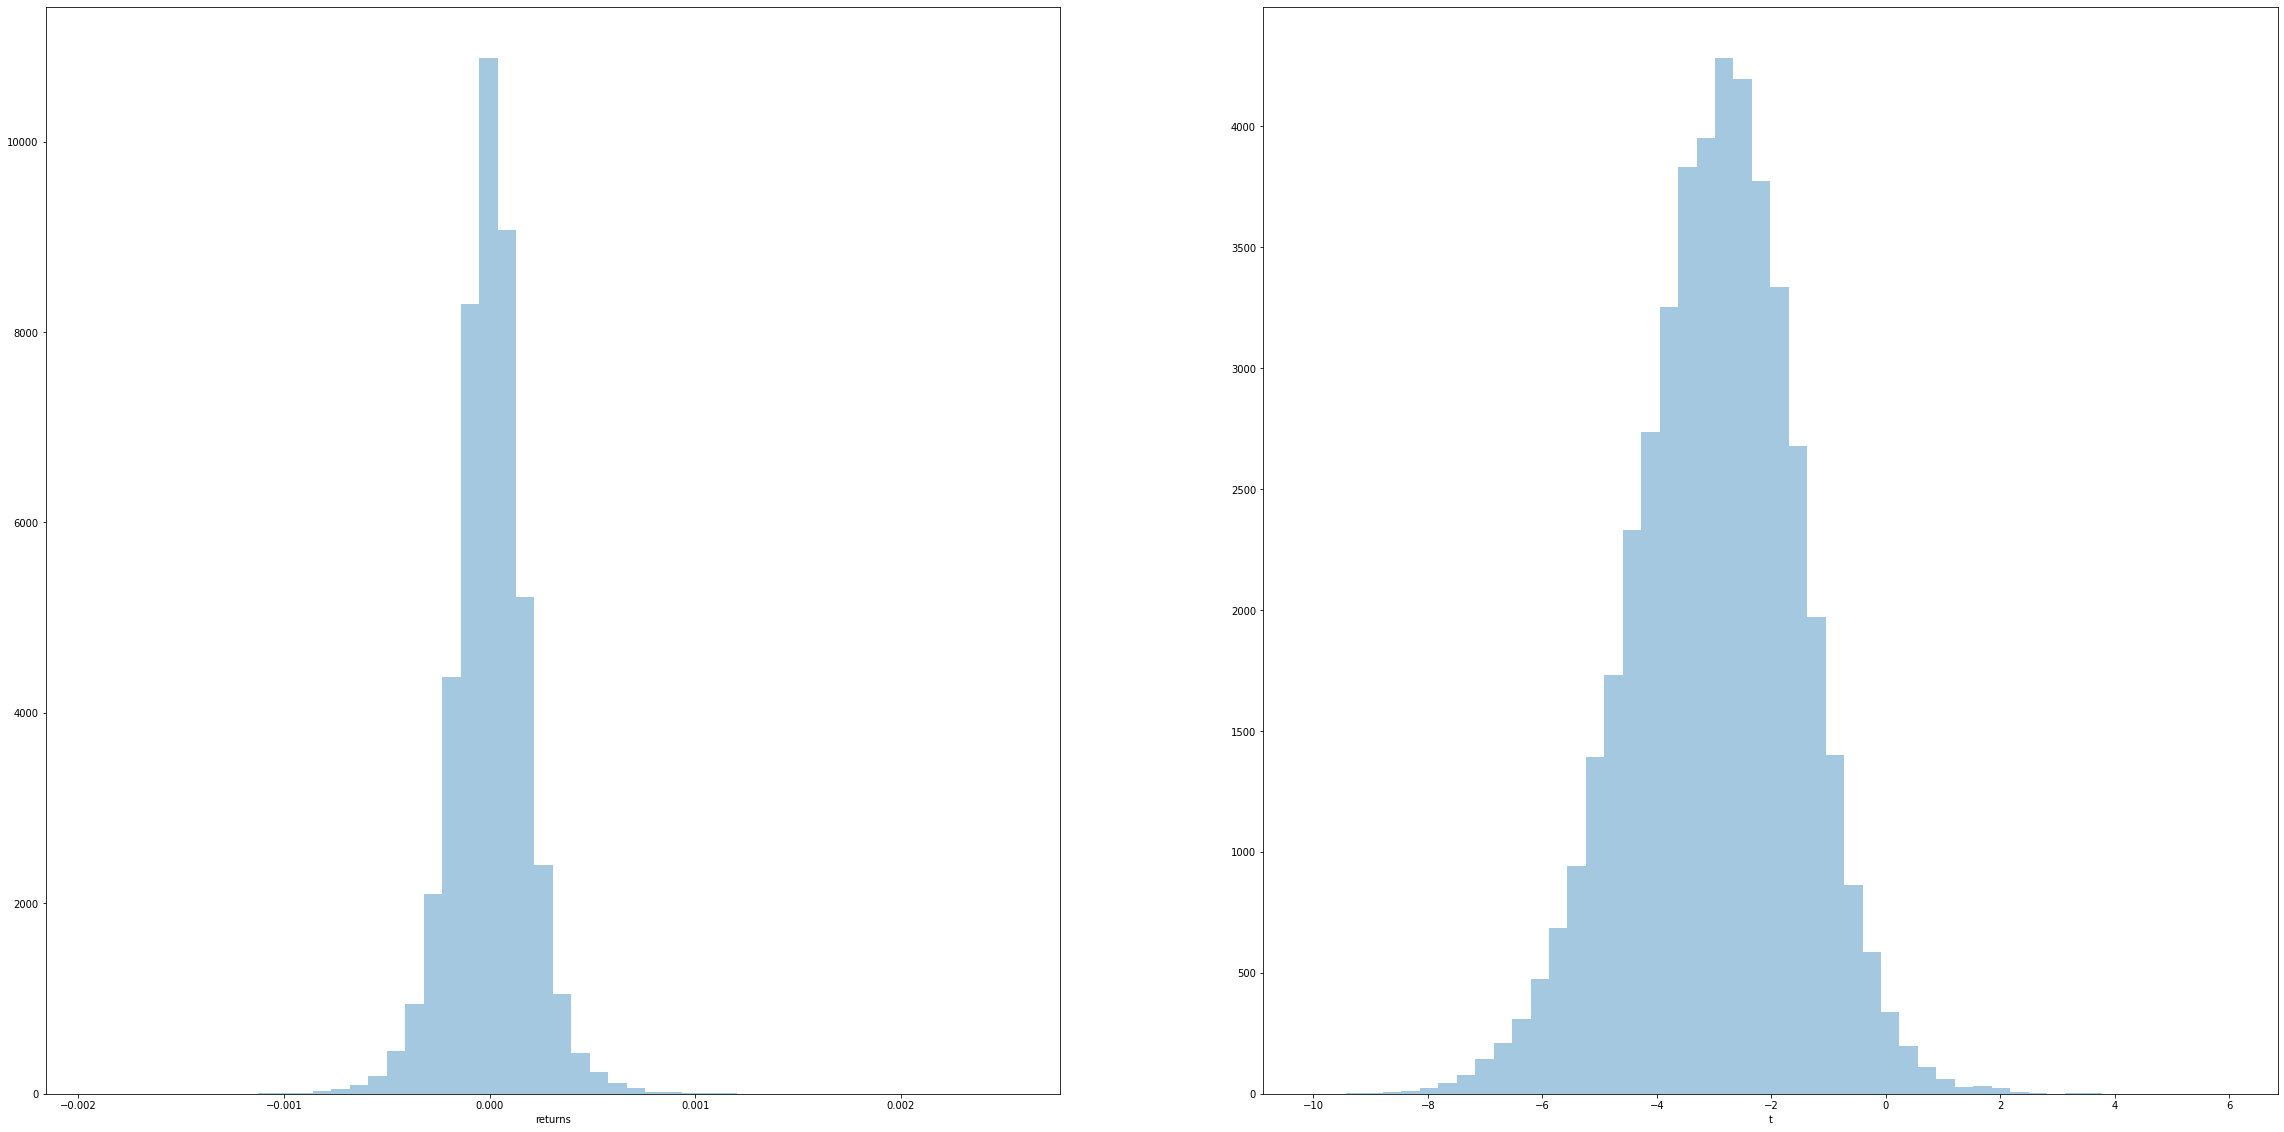

In [21]:
a4_dims = (40,20)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.distplot(df.returns, kde=False, ax=axes[0])
sns.distplot(df.t, kde=False, ax=axes[1])
plt.show()

In [ ]:
# a4_dims = (40,50)
# fig, axes = plt.subplots(nrows=4,ncols=1,figsize=a4_dims)
# df[(df.t <-2) & (df.TradeDay==0)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[0])
# df[(df.t <-2) & (df.TradeDay==1)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[1], color="#123456")
# df[(df.t <-2) & (df.TradeDay==2)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[2], color="#ac3489")
# df[(df.t <-2) & (df.TradeDay==3)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[3], color="#123456")
# df[(df.t <-2) & (df.TradeDay==4)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[3], color="#123456")

In [ ]:
# data=df[df.Hour==15]
# sns.set_style("darkgrid")
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
# for index, row in df.iterrows():
#   if row["t_val24"] > 2:
#     print(row["avg"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84085fa5c0>,
      dtype=object)

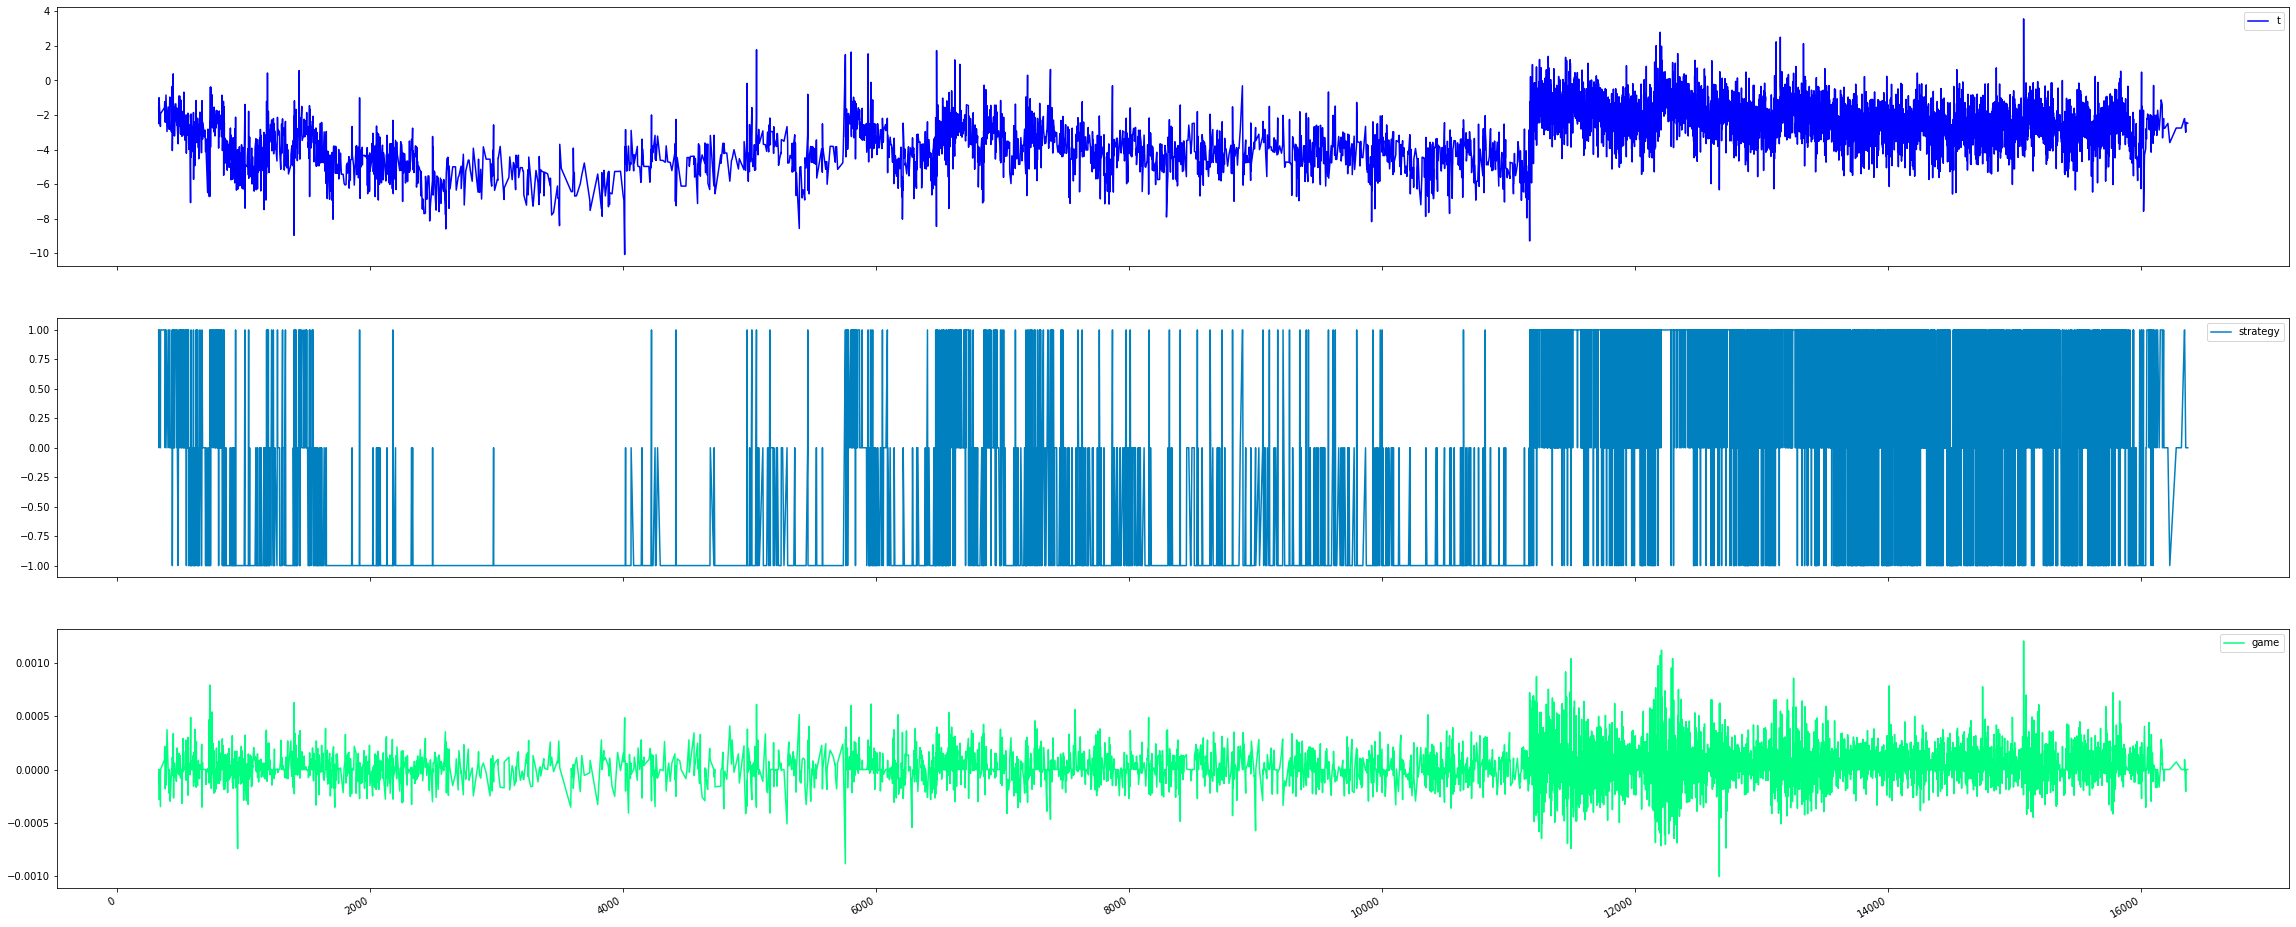

In [22]:
df[(df.TradeDay==0)][['t','strategy', 'game']].plot(kind='line', subplots=True, use_index=True,figsize=(40,18), colormap='winter')

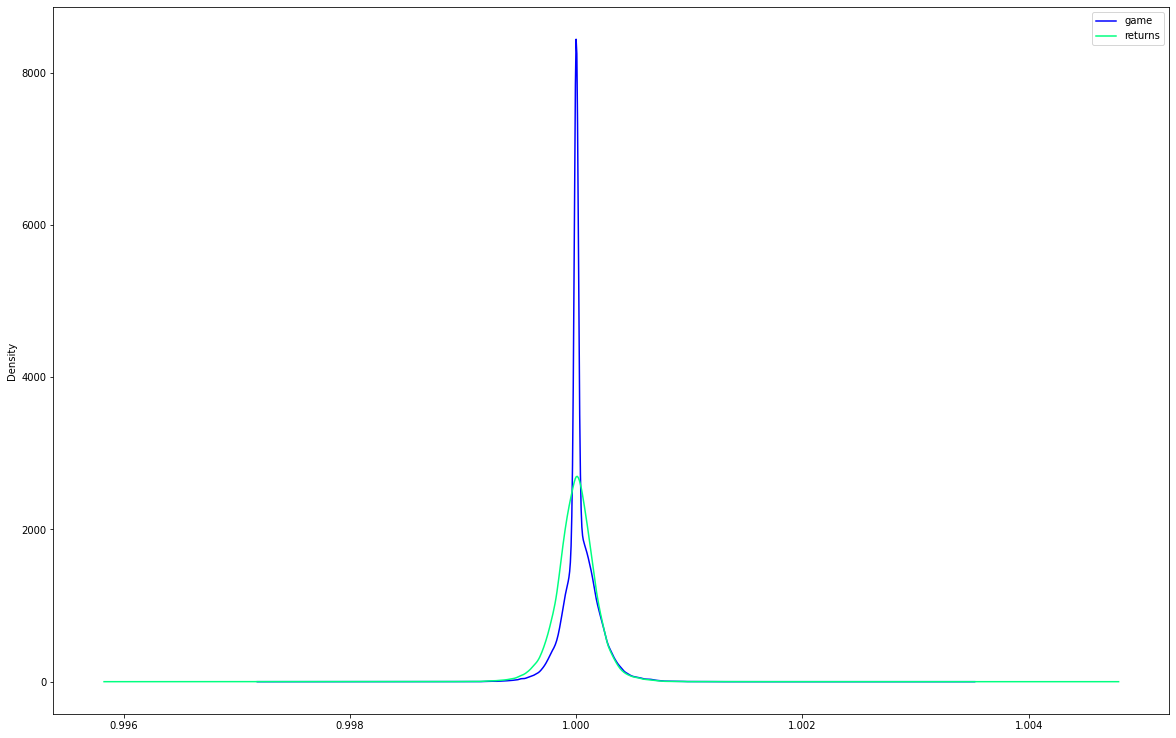

In [23]:
df[['game', 'returns']].apply(np.exp).plot(kind='kde', subplots=False, use_index=True,figsize=(20,13), colormap='winter')

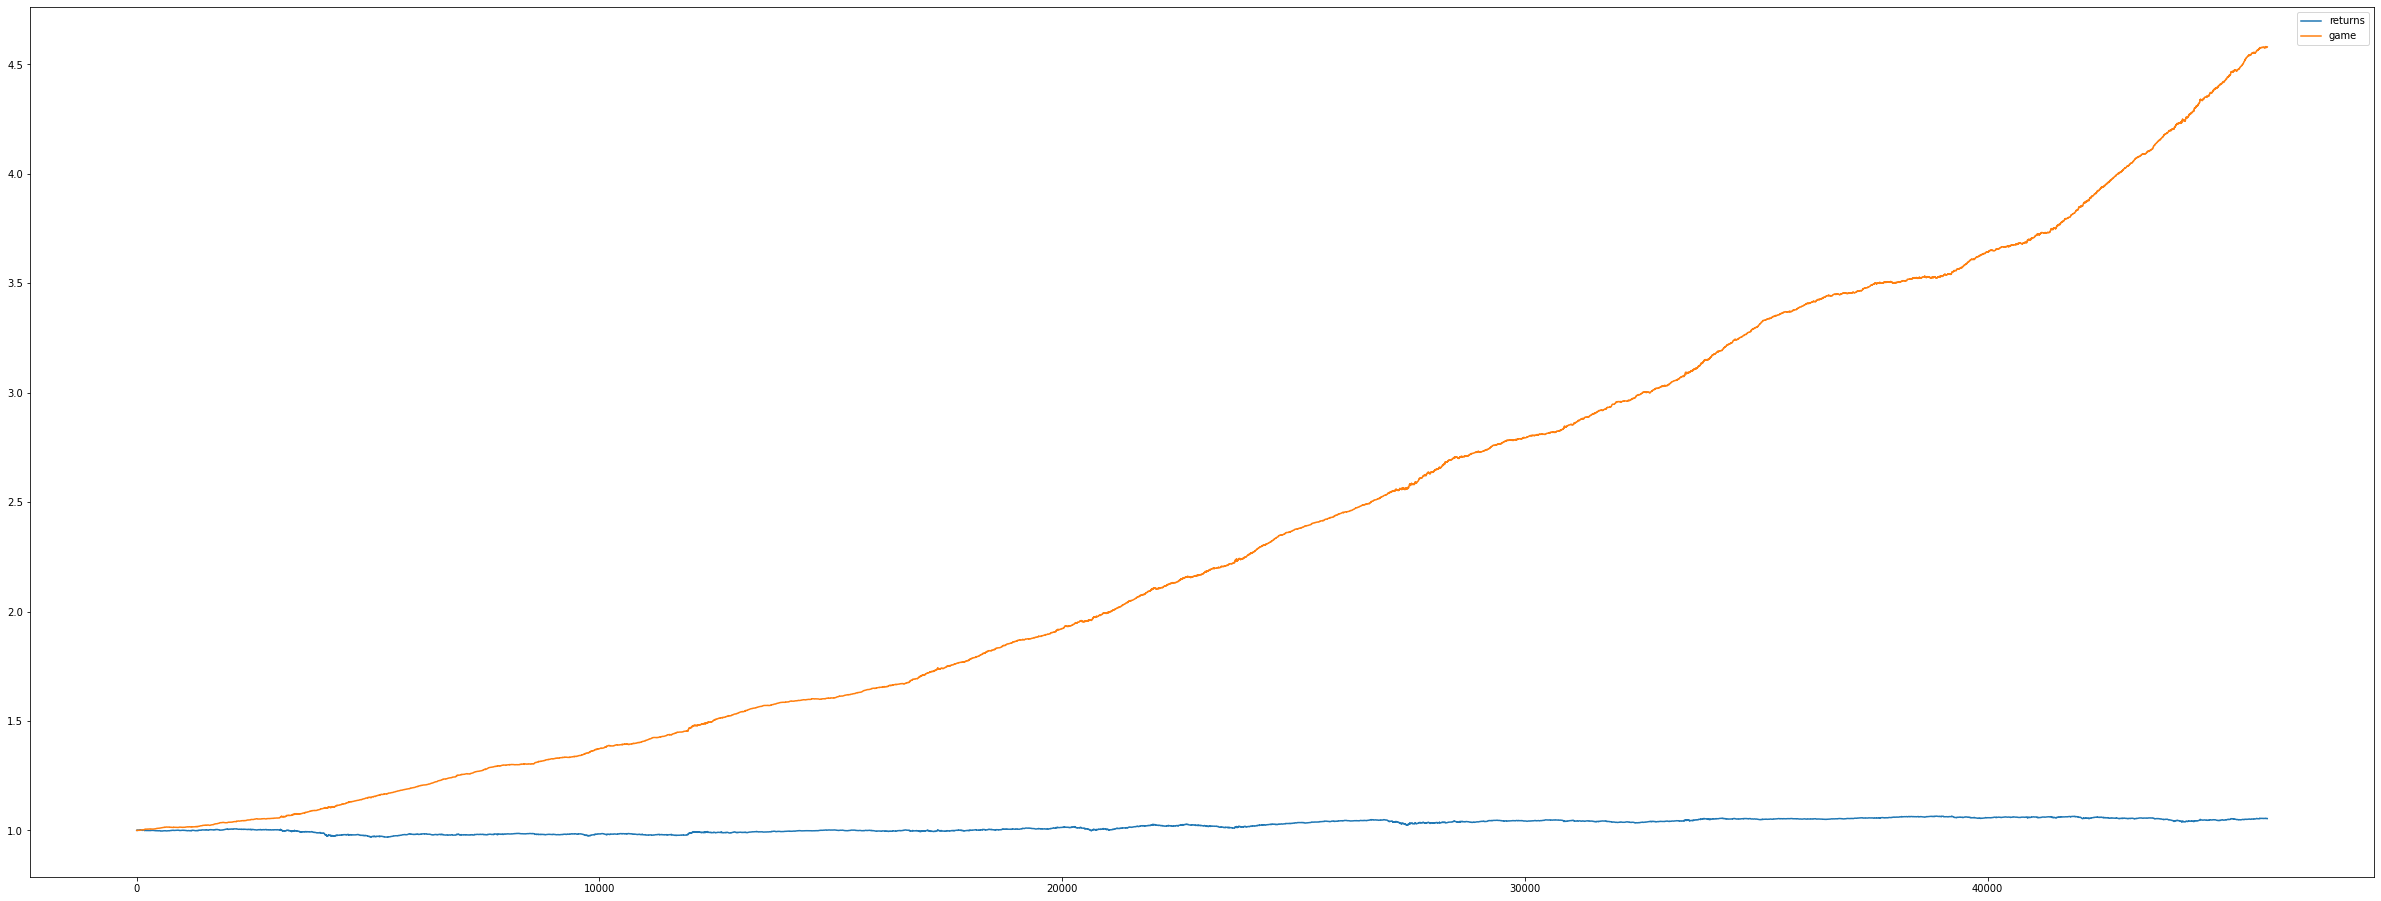

In [24]:
df[['returns','game']].cumsum().apply(np.exp).plot(figsize=(42,16), use_index=False)

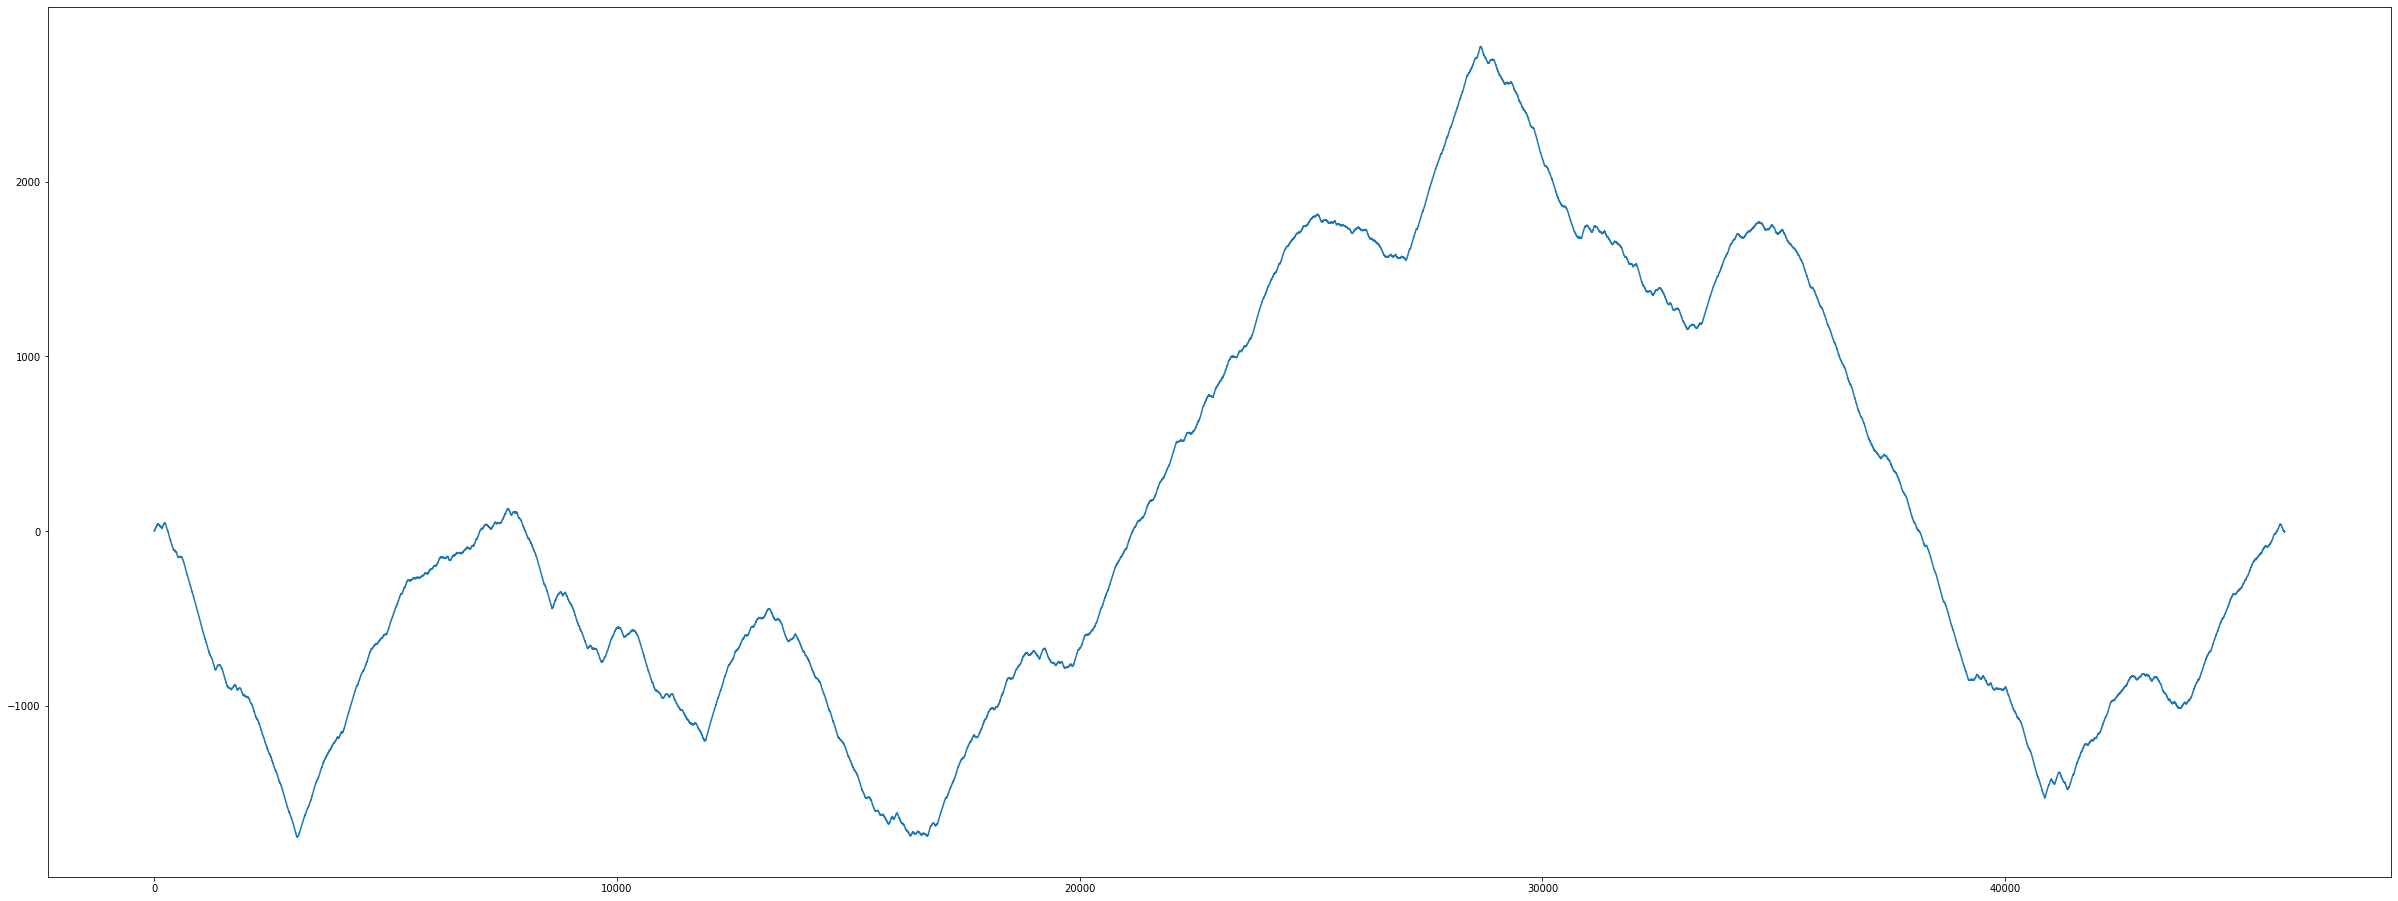

In [25]:
df.strategy.cumsum().plot(figsize=(42,16), use_index=False)